In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Fractal image

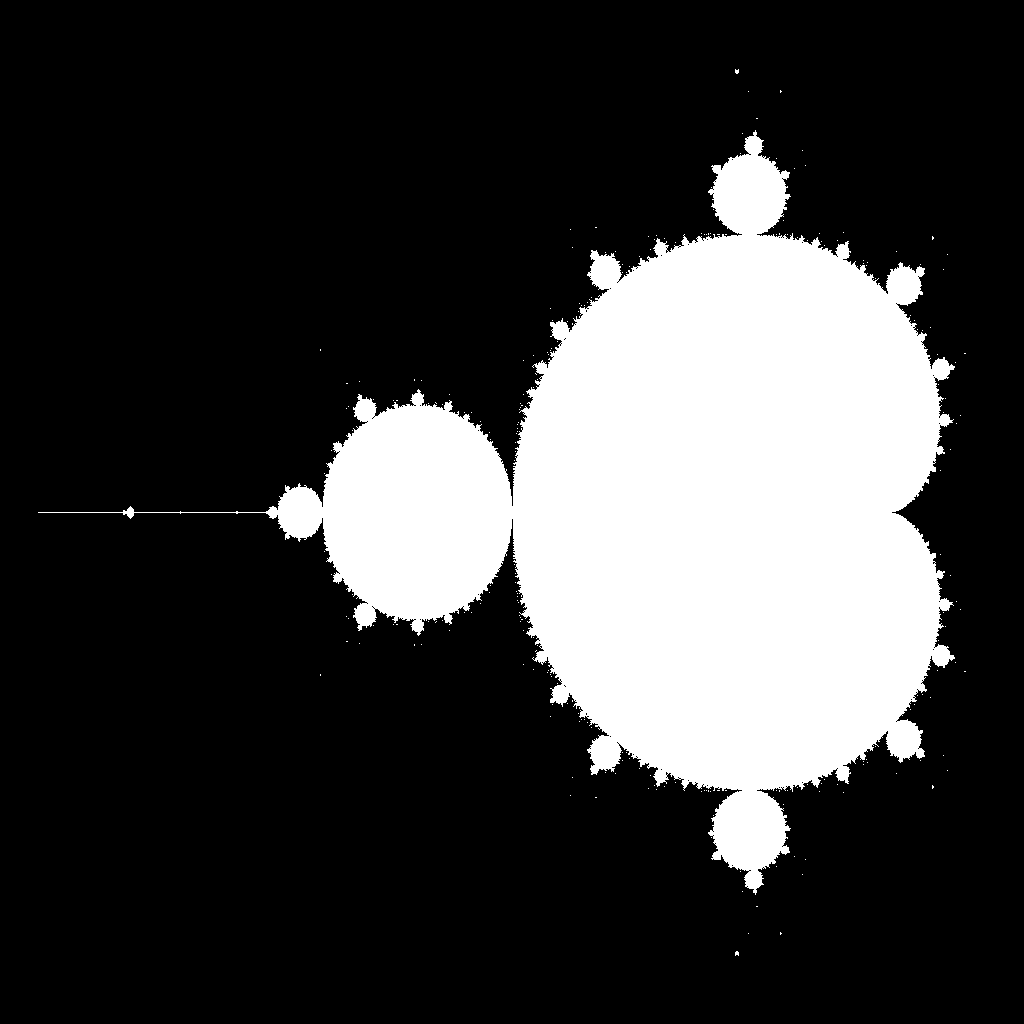

In [2]:
mandelbrodt = pd.read_csv('lab2_mf_threadlist.txt', sep=',')
mandelbrodt['x_pix'] = mandelbrodt.x.rank(method='dense')
mandelbrodt['y_pix'] = mandelbrodt.y.rank(method='dense')
img = Image.new( 'RGB', (mandelbrodt['x_pix'].unique().size, mandelbrodt['y_pix'].unique().size), "black")
pixels = img.load()
for _, row in mandelbrodt.iterrows():
    color_value = int(255*row.converged)
    pixels[row.x_pix-1, row.y_pix-1] = (color_value, color_value, color_value)
display(img)

# Computation time

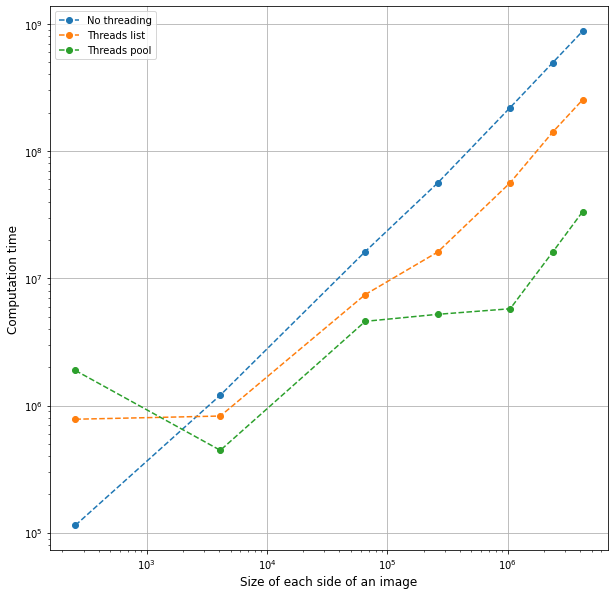

In [3]:
ct_data1 = pd.read_csv('lab1_mean_computations.csv')
ct_data2 = pd.read_csv('lab2_mean_computations_threadlist.csv')
ct_data3 = pd.read_csv('lab2_mean_computations_threadpool.csv')


f, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel('Computation time', fontsize='large')
ax.set_xlabel('Size of each side of an image', fontsize='large')
ax.plot(ct_data1['size']**2, ct_data1.time, ls = '--', label = 'No threading', marker='o')
ax.plot(ct_data2['size']**2, ct_data2.time, ls = '--', label = 'Threads list', marker='o')
ax.plot(ct_data3['size']**2, ct_data3.time, ls = '--', label = 'Threads pool', marker='o')
ax.loglog()
ax.grid(True)
ax.legend()
plt.show()